# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_data_fle = "output_data/Fig1.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

counter = 0
setnumber = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
api_key = weather_api_key
# Here is the url for the open weather maps api which I will use to extract the data
url = 'http://api.openweathermap.org/data/2.5/weather?'

In [4]:
# Now I need a empty list to store the append data into  
city_name = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []

# This will hold the data palces in Record and set
record = 0
setnumber = 1

# Creating the header that confirms data retrieval
print('Beginning Data Retrival')
print ('------------------------')

# begin the loop call, the code below will create a query url and use the API key to pull the data then by using append the data will add onto an expanding list. The record and set will increase as needed
for city in cities:
    try:
        Qurl = f'{url}appid={api_key}&units={units}&q='
        weather_data = requests.get(Qurl + city).json() 
        cloudy.append(weather_data['clouds']['all'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data['coord']['lat'])
        lon.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        wind.append(weather_data['wind']['speed'])
        time.sleep(1.02)
        if record > 49:
            record = 1
            setnumber += 1
            city_name.append(city)
        else:
            record += 1 
            city_name.append(city)
        print(f'Processing Record {record} of set {setnumber} | {city}')
    except:
#          print('City not found. Skipping...')
        pass
print('------------------------')
print('Data Retrival Completed')
print('------------------------')
#     Ill use try and except that way like in the example if I cannot get a city ill print a statement

Beginning Data Retrival
------------------------
Processing Record 1 of set 1 | bilibino
Processing Record 2 of set 1 | the pas
Processing Record 3 of set 1 | rikitea
Processing Record 4 of set 1 | ribeira grande
Processing Record 5 of set 1 | bredasdorp
Processing Record 6 of set 1 | new norfolk
Processing Record 7 of set 1 | sitka
Processing Record 8 of set 1 | hilo
Processing Record 9 of set 1 | seoul
Processing Record 10 of set 1 | steamboat springs
Processing Record 11 of set 1 | awbari
Processing Record 12 of set 1 | punta arenas
Processing Record 13 of set 1 | dikson
Processing Record 14 of set 1 | hualmay
Processing Record 15 of set 1 | kishanganj
Processing Record 16 of set 1 | sapa
Processing Record 17 of set 1 | kapaa
Processing Record 18 of set 1 | qaanaaq
Processing Record 19 of set 1 | pisco
Processing Record 20 of set 1 | busselton
Processing Record 21 of set 1 | kruisfontein
Processing Record 22 of set 1 | rosetta
Processing Record 23 of set 1 | ostrovnoy
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Dictionary establishing and df creation
weatherD = {
    'City' : city_name,
    'Cloudiness' : cloudy,
    'Country' : country,
    'Date' : date,
    'Humidity': humidity,
    'Lat' : lat,
    'Lng' : lon,
    'Max Temp' : max_temp,
    'Wind Speed' : wind,
}
# Now load the new df into my created dictionary
weather_df = pd.DataFrame(weatherD)
weather_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [23]:
# This sends the data into the CSV 
weather_df.to_csv = ('Output_CSV/weather_data.csv')

In [24]:
# Glimps of the data 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bilibino,77,RU,1587527772,85,68.05,166.44,16.00,0.96
1,the pas,90,CA,1587527773,86,53.83,-101.25,28.40,5.82
2,rikitea,100,PF,1587527680,78,-23.12,-134.97,76.03,16.55
3,ribeira grande,84,PT,1587527775,73,38.52,-28.70,58.82,11.70
4,bredasdorp,0,ZA,1587527776,81,-34.53,20.04,51.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

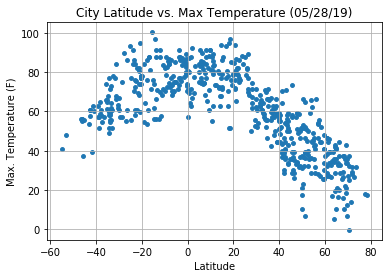

In [25]:
# Create the scatter plot for the weather info by latitude vs temperature 
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', s=15)
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show scatter plot
plt.show()

#### Latitude vs. Humidity Plot

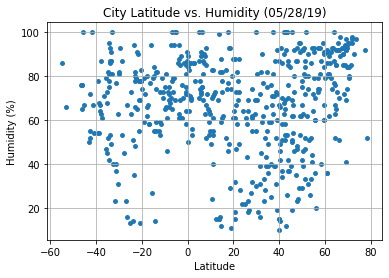

In [27]:
# create the scatter plot for the latitude vs humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', s=15)


plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

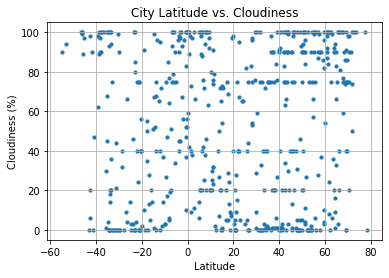

In [28]:

# Create the scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

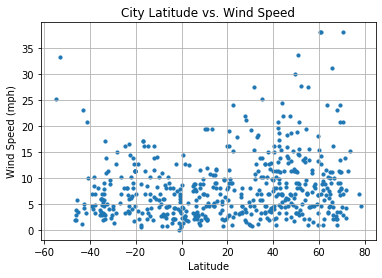

In [29]:
# Create the scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


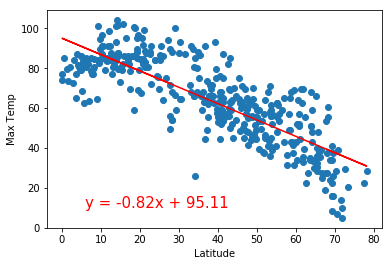

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


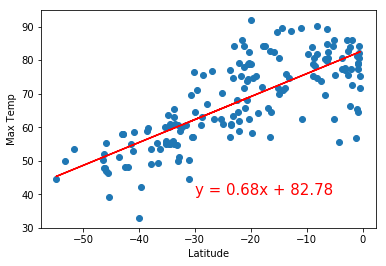

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


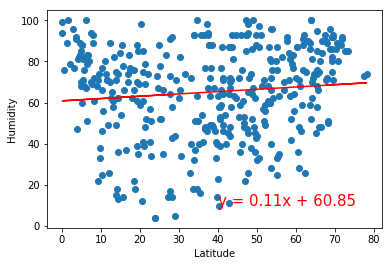

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


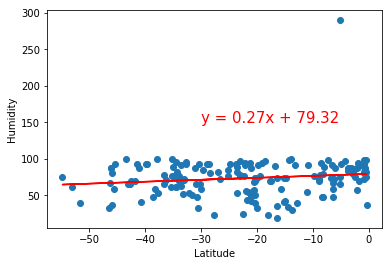

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


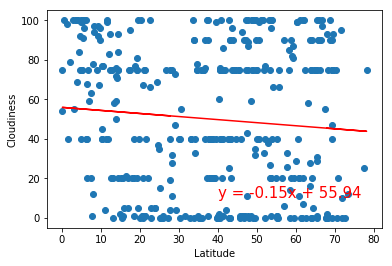

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


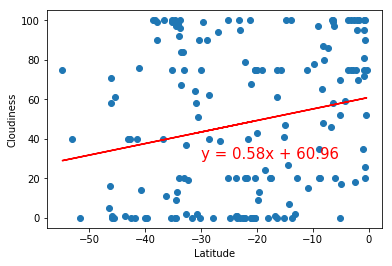

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


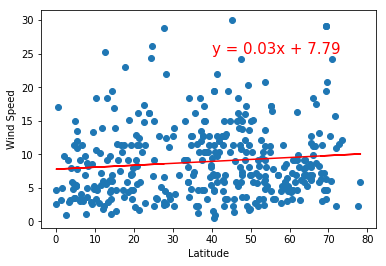

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


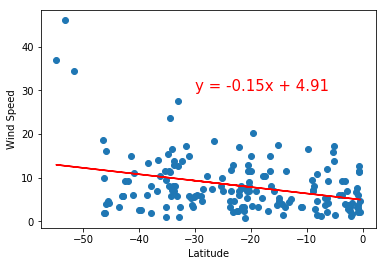